# Binary Perceptron (Rosenblatt)

 * Для первой обучающей выборки построить и обучить сеть, которая будет правильно относить точки к двум классам. 
 * Отобразить дискриминантную линию и проверить качество обучения

In [526]:
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

def hardlim(x):
    if x >=0: 
        return 1 
    else : 
        return 0

class BinaryPerceptron:
    
    def __init__(self, epoch=50, learning_rate=1, random_state=1):
        self.w = np.array([])
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.random_state = random_state

    def fit(self, x, y):
        rand = np.random.RandomState(self.random_state)
        n_features,n_objects  = x.shape #число обьектов,число признаков
        self.xtrain = np.vstack((x,np.ones(n_objects)))
        self.ytrain = y
        self.w = rand.normal(loc=0.0, scale=0.01, size=n_features+1)
        k=self.w
        print(k)

        #list_of_params.append(k)
        e=1
        error=1
        sum_errors=0
        while (e<self.epoch and error!=0):
            list_of_params.append(self.w)
            for index, iy in enumerate(self.ytrain):
                y_pred = hardlim(np.dot(self.w.T, self.xtrain[:,index]))
                error =iy-y_pred 
                
                self.w += error*self.learning_rate*(iy * self.xtrain[:,index] )
                print(self.w)
            e+=1
        return(self.w,list_of_params)
                
    def predict(self, x):
        y_pred=[]
        n_features,n_objects  = x.shape
        self.xtest = np.vstack((x,np.ones(n_objects)))
        for index in range(self.xtest.shape[1]):
            y_pred.append(hardlim(np.dot(self.w.T, self.xtest[:,index])))
        return (y_pred)
            

In [480]:
X=np.array([[4.7,-4.2,-1.4,0.9,-1.4,-4.2],[3.6,-1.4,1.8,2.8,-3,2.7]])
y=np.array([0,1,1,1,1,1])

b_per = BinaryPerceptron(epoch=50, learning_rate=1, random_state=5)
weights,list_of_params=b_per.fit(X, y)
#print(mae(y,y_predicted))
#print('list',list_of_params)
#!pip list
first=[ 0.00441227,-0.0033087,0.02430771]

[ 0.00441227 -0.0033087   0.02430771]
[ 0.00441227 -0.0033087   0.02430771]
[ 0.00441227 -0.0033087   0.02430771]
[ 0.00441227 -0.0033087   0.02430771]
[ 0.00441227 -0.0033087   0.02430771]
[ 0.00441227 -0.0033087   0.02430771]
[-4.19558773  2.6966913   1.02430771]
[-4.19558773  2.6966913   1.02430771]
[-4.19558773  2.6966913   1.02430771]
[-4.19558773  2.6966913   1.02430771]
[-4.19558773  2.6966913   1.02430771]
[-5.59558773 -0.3033087   2.02430771]
[-5.59558773 -0.3033087   2.02430771]


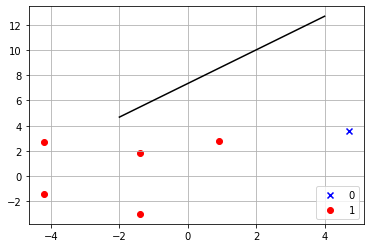

In [481]:

class1=[[],[]]
class2=[[],[]]
for i in range(len(y)):
    if y[i]==0:
        class1[0].append(X[0][i])
        class1[1].append(X[1][i])
    else:
        class2[0].append(X[0][i])
        class2[1].append(X[1][i])
        
plt.scatter(class1[0], class1[1],
            color='blue', marker='x', label='0')
plt.scatter(class2[0], class2[1],
            color='red', marker='o', label='1')

plt.legend(loc='lower right')
plt.grid()

def decision(t,list_of_params): 
    return -(first[0] * t + first[2])/first[1]
plt.plot(t, decision(t,list_of_params), color="black")


In [482]:
X1=np.array([[4.7,-4.2,-1.4,-2,2,4],[3.6,-1.4,1.8,4,-4,2]])
y1=np.array([0,1,1,1,0,0])

y_predicted=b_per.predict(X1)

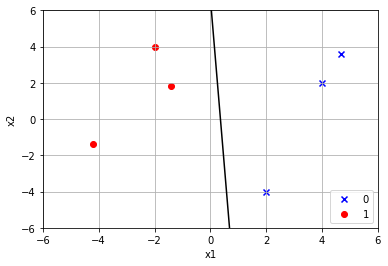

In [519]:
import matplotlib.pyplot as plt

class1=[[],[]]
class2=[[],[]]
for i in range(len(y1)):
    if y1[i]==0:
        class1[0].append(X1[0][i])
        class1[1].append(X1[1][i])
    else:
        class2[0].append(X1[0][i])
        class2[1].append(X1[1][i])
        
plt.scatter(class1[0], class1[1],
            color='blue', marker='x', label='0')
plt.scatter(class2[0], class2[1],
            color='red', marker='o', label='1')

t = np.linspace(-2,4,num=50)

def decision(x): 
    return -(weights[0] * x + weights[2])/weights[1]

plt.plot(t, decision(t), color="black")

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()
plt.show()

#print(list_of_params)

# Non Linear Separability Classes

* Изменить обучающее множество так, чтобы классы стали линейно неразделимыми. 
* Проверить возможности обучения по правилу Розенблатта.

In [531]:
X=np.array([[4.7,-4.2,-1.4,0.9,-1.4,-4.2],[3.6,-1.4,1.8,2.8,-3,2.7]])
y=np.array([0,0,1,1,1,1])

b_per = BinaryPerceptron(epoch=1000, learning_rate=1, random_state=1)
b_per.fit(X, y)
#print(weights)
b_per.predict(X)

[ 0.01624345 -0.00611756 -0.00528172]
[ 0.01624345 -0.00611756 -0.00528172]
[ 0.01624345 -0.00611756 -0.00528172]
[-1.38375655  1.79388244  0.99471828]
[-1.38375655  1.79388244  0.99471828]
[-2.78375655 -1.20611756  1.99471828]
[-2.78375655 -1.20611756  1.99471828]


[0, 1, 1, 0, 1, 1]

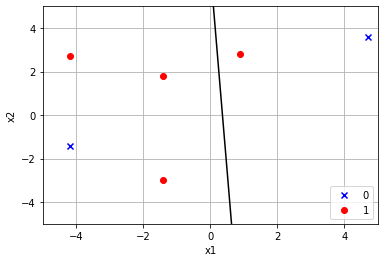

In [533]:
import matplotlib.pyplot as plt

class1=[[],[]]
class2=[[],[]]
for i in range(len(y)):
    if y[i]==0:
        class1[0].append(X[0][i])
        class1[1].append(X[1][i])
    else:
        class2[0].append(X[0][i])
        class2[1].append(X[1][i])
        
plt.scatter(class1[0], class1[1],
            color='blue', marker='x', label='0')
plt.scatter(class2[0], class2[1],
            color='red', marker='o', label='1')

t = np.linspace(-2,4,num=50)

def decision(x): 
    return -(weights[0] * x + weights[2])/weights[1]

plt.plot(t, decision(t), color="black")

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.show()

# Multiclass Perceptron (Rosenblatt) with Pytorch

* Для второй обучающей выборки построить и обучить сеть, которая будет правильно относить точки к четырем классам. 
* Отобразить дискриминантную линию и проверить качество обучения.

In [534]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as fun

def hardlim(x):
    y = torch.empty(x.size(dim=0),x.size(dim=1))
    for i in range(x.size(dim=1)):
        for j in range(x[:,i].size(dim=0)):
            if  x[j,i]>=0: 
                y[j,i]=1
            else : 
                y[j,i]=0
    return y

In [535]:
class Perceptron_Rosenblatt(nn.Module):
    def __init__(self, nX, nY):        
        super(Perceptron_Rosenblatt, self).__init__() # конструктор предка с этим именем
        self.fc1 = nn.Linear(nX, nY)
        self.fc1.weight.detach()
        self.fc1.bias.detach()# создаём параметры модели
          
    def forward(self, x): # задаётся прямой проход
        x = self.fc1(x)   # выход слоя
        x = hardlim(x)                                
        return x
          

In [486]:
model = Perceptron_Rosenblatt(2, 2)

In [536]:
def train(model, x, y, num_epochs, learning_rate=0.01, random_state=3):               
    
    torch.manual_seed(random_state)  
    shuffle_idx = torch.randperm(y.size(0), dtype=torch.long) #задаем параметр перемешивания 
    x_i = x[shuffle_idx]
    y_i = y[shuffle_idx]
    list_of_params=[]
    e=1
    err=torch.ones_like(y_i) #устанавливаем начальную ошибку
    while e<num_epochs and torch.any(torch.ne(err,torch.zeros_like(y_i))):
        y_pred = model.forward(x_i)     # прямое распространение
        err=y_i-y_pred
        for i in range(err.size(dim=0)):
            if torch.any(torch.ne(err[i],torch.zeros_like(err[i]))):
                print(*model.parameters())
                with torch.no_grad(): #обновляем веса
                    model.fc1.weight += learning_rate*err[i]*torch.t(x_i[i])
                    model.fc1.bias += learning_rate*err[i]
                    
        e+=1
    return(list(model.parameters()))



In [537]:
X_arr=np.array([[-2.7,1,-0.5,2.7,1.6,3.4,-2.5,0.8],[-3.9,-0.5,1.6,-1.5,-0.9,3.3,1.1,0.4]])
y_arr=np.array([[1, 0, 1, 0, 0, 0, 1, 0],[1, 0, 0, 0, 0 ,0 ,1 ,0]])


X_at=np.array([[-2.7,2.7,1.6,3.4,-2.5,0.8,-3,-0.8,1.4,-0.5,0],[-3.9,-1.5,-0.9,3.3,1.1,0.4,-1.6,3.5,1.2,0.5,0]])
X_t=torch.empty(len(X_at[0]),len(X_at))


X=torch.empty(len(X_arr[0]),len(X_arr))
y=torch.empty(len(y_arr[0]),len(y_arr))

for i in range(len(X_arr[0])): #парсим вход для нужного нам вида
    for j in range(len(X_arr[0])):
        X[i,0],X[i,1]=X_arr[0][i],X_arr[1][i]
        y[i,0],y[i,1]=y_arr[0][i],y_arr[1][i]

for i in range(len(X_at[0])): #парсим вход для нужного нам вида
    for j in range(len(X_at[0])):
        X_t[i,0],X_t[i,1]=X_at[0][i],X_at[1][i]

In [538]:
X_train=X[:5,:]
y_train=y[:5,:]       

fit_param = train(model, #обучаем модель на тренировочной выборке
             X_train, y_train,
             num_epochs=50,
             learning_rate=0.01,
             random_state=1)

weigths_param, bias_param=fit_param[0], fit_param[1] #запоминаем параметры модели для построения

print(weigths_param, bias_param)

Parameter containing:
tensor([[-0.6657,  0.0781],
        [-0.1455,  0.0137]], requires_grad=True) Parameter containing:
tensor([ 0.0983, -0.0966], requires_grad=True)


In [539]:
train_pred = model.forward(X_t) #проверяем на тестовой

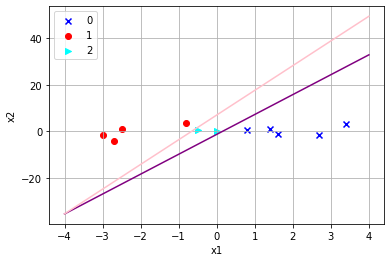

In [540]:
import matplotlib.pyplot as plt

class1=[[],[]]
class2=[[],[]]
class3=[[],[]]

for i in range(train_pred.size(dim=0)):
    if torch.equal(train_pred[i,:],torch.zeros_like(train_pred[i,:])):
        class1[0].append(X_t[i,0].item())
        class1[1].append(X_t[i,1].item())
    elif torch.equal(train_pred[i,:],torch.ones_like(train_pred[i,:])):
        class2[0].append(X_t[i,0].item())
        class2[1].append(X_t[i,1].item())
    else:
        class3[0].append(X_t[i,0].item())
        class3[1].append(X_t[i,1].item())
        
        
plt.scatter(class1[0], class1[1],
            color='blue', marker='x', label='0')
plt.scatter(class2[0], class2[1],
            color='red', marker='o', label='1')
plt.scatter(class3[0], class3[1],
            color='cyan', marker='>', label='2')

t = np.linspace(-4,4,num=50)

def decision(x): 
    answer=[]
    for i in range(2):
         answer.append(-(weigths_param[i][0].item() * x + bias_param[i].item())/weigths_param[i][1].item())
    return answer

plt.plot(t, decision(t)[0], color="purple")
plt.plot(t, decision(t)[1], color="pink")

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.show()

